Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. 
Create a convolutional neural network that trains to 100% accuracy on these images,  which cancels training upon hitting training accuracy of >.999

In [0]:
import tensorflow as tf
import PIL

In [6]:
from google.colab import files

uploaded = files.upload()

Saving happy-or-sad.zip to happy-or-sad (1).zip


In [11]:
!ls

'happy-or-sad (1).zip'	 happy-or-sad.zip   sample_data


In [0]:
import os
import zipfile

local_zip = '/content/happy-or-sad.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/happy-or-sad')
zip_ref.close()

In [13]:
happy_dir = '/content/happy-or-sad/happy' 
sad_dir =  '/content/happy-or-sad/sad' 

happy_names = os.listdir(happy_dir)
sad_names = os.listdir(sad_dir)

print(happy_names[:10])

print('total happy images:', len(os.listdir(happy_dir)))
print('total sad images:', len(os.listdir(sad_dir)))

['happy1-16.png', 'happy2-06.png', 'happy2-04.png', 'happy2-19.png', 'happy2-09.png', 'happy2-11.png', 'happy1-10.png', 'happy2-14.png', 'happy2-18.png', 'happy1-19.png']
total happy images: 40
total sad images: 40


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

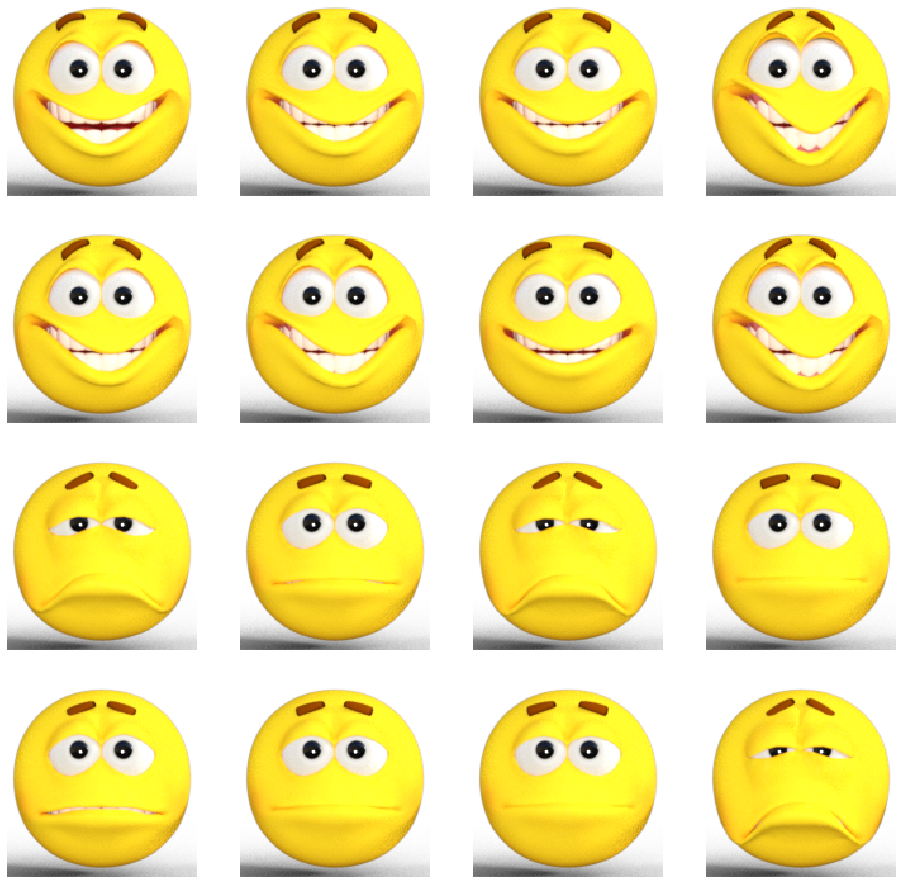

In [15]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_happy_pix = [os.path.join(happy_dir, fname) 
                for fname in happy_names[pic_index-8:pic_index]]
next_sad_pix = [os.path.join(sad_dir, fname) 
                for fname in sad_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_happy_pix+next_sad_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [0]:
# GRADED FUNCTION: train_happy_sad_model
def train_happy_sad_model():
    # Please write your code only where you are indicated.
    # please do not remove # model fitting inline comments.

    DESIRED_ACCURACY = 0.99

    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('acc')>=DESIRED_ACCURACY:
                print("Reached 99.9% accuracy so cancelling training!")
                self.model.stop_training=True
         # Your Code

    # This Code Block should Define and Compile the Model. Please assume the images are 150 X 150 in your implementation.
    model = tf.keras.models.Sequential([
        # Note the input shape is the desired size of the image 300x300 with 3 bytes color
        # This is the first convolution
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        # The second convolution
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # The third convolution
        tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
        tf.keras.layers.Flatten(),
        # 512 neuron hidden layer
        tf.keras.layers.Dense(512, activation='relu'),
        # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

   # from tensorflow.keras.optimizers import RMSprop

    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])
        

    # This code block should create an instance of an ImageDataGenerator called train_datagen 
    # And a train_generator by calling train_datagen.flow_from_directory

    from tensorflow.keras.preprocessing.image import ImageDataGenerator

    train_datagen = ImageDataGenerator(rescale=1/255)

    # Please use a target_size of 150 X 150.
    train_generator = train_datagen.flow_from_directory('/content/happy-or-sad',  
        target_size=(150,150),  
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
    history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=10, callbacks=[myCallback()])
    return model, history.history['acc'][-1]

In [26]:
# The Expected output: "Reached 99% accuracy so cancelling training!""
model,_ = train_happy_sad_model()

Found 80 images belonging to 2 classes.
Epoch 1/10
8/8 [==============================] - 4s 560ms/step - loss: 0.7767 - acc: 0.5500
Epoch 2/10
8/8 [==============================] - 4s 480ms/step - loss: 0.4138 - acc: 0.7875
Epoch 3/10
8/8 [==============================] - 4s 476ms/step - loss: 0.1663 - acc: 0.9250
Epoch 4/10
8/8 [==============================] - 4s 476ms/step - loss: 0.1311 - acc: 0.9500
Epoch 5/10
8/8 [==============================] - 4s 476ms/step - loss: 0.1002 - acc: 0.9750
Epoch 6/10
8/8 [==============================] - 4s 474ms/step - loss: 0.0411 - acc: 0.9875
Epoch 7/10
8/8 [==============================] - 4s 469ms/step - loss: 0.0281 - acc: 1.0000


In [21]:
uploaded = files.upload()

Saving smile.jpg to smile.jpg


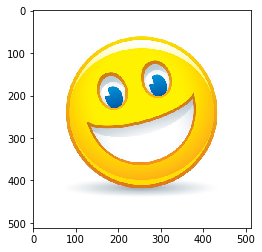

In [23]:
img = mpimg.imread('/content/smile.jpg')
plt.imshow(img)
plt.show()

In [28]:
import numpy as np
from keras.preprocessing import image

fn = 'smile.jpg'

path = '/content/' + fn

img = image.load_img(path, target_size=(150,150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)

print(classes[0])

if classes[0]>0.5:
  print(fn + " is happy")
else:
  print(fn + " is sad")
 

[1.]
smile.jpg is happy
